**Análisis númerico 2024-1.**

---



**Grupo 1:**

*   Kevin Santiago Trivino Vanegas.
*   Alejandro Patiño Bedoya
*   Jhon Fredy Aguirre García.



In [ ]:
# Librerias necesarias:
import math # Para funciones matemáticas.
import numpy as np # Para trabajos con vectores.
import pandas as pd # Para realizar tablas.
from IPython.display import display # Imprimir tablas de manera llamativa.
import matplotlib.pyplot as plt # Para hacer gráficas.

# Ejercicio 3.f:

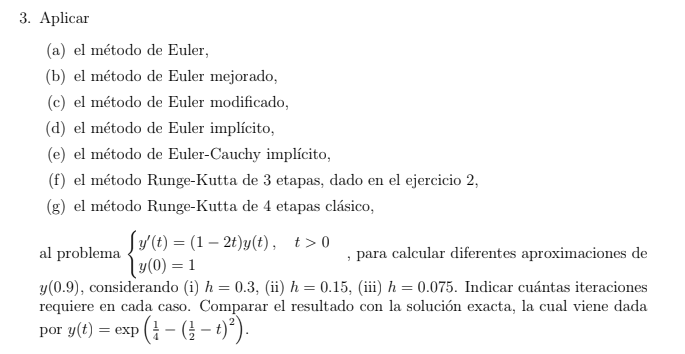

---
Ejercicio 2 que presenta el método de Runge-Kutta:
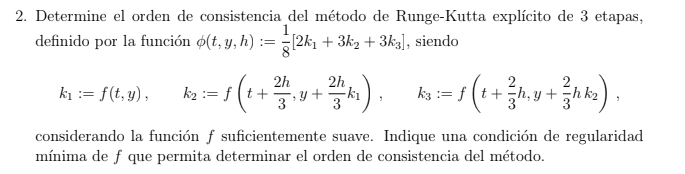

## Método de Runge-Kutta de 3 etapas:

In [ ]:
# Solución exacta.
t = 0.9 # Valor de t solicitado.
real = math.exp((1/4)-((1/2)-t)**2) # y(0.9).

# Definimos y'(t)=f(t,y(t)):
def funcion_f(t, yt):
  return (1-2*t)*yt

#
def aproximado(h, b = 0.9):
  yt = 1 #Valor inicial y(0) = 1
  n = 0  #Contador de numero de pasos
  t = 0  #Inicio del intervalo [0, 0.9]
  while n < b / h:
    t = n*h
    # Valores de K.
    k1 = funcion_f(t, yt)
    k2 = funcion_f(t + 2*h/3, yt + 2*h*k1/3)
    k3 = funcion_f(t+2*h/3, yt + 2*h*k2/3)
    O = (1/8) * (2*k1 + 3*k2 + 3*k3)
    yt = yt + O*h
    n = n + 1 # Se suma un paso más.
  return f'\n\tNumero de pasos: {n}.\n \tAproximación: {yt}.\n \tError: {abs(real - yt)}'

# Imprimimos los resultados
print("Valor real: ", real)
print('Considerando (i) h = 0.3:', aproximado(0.3))
print('Considerando (ii) h = 0.15:', aproximado(0.15))
print('Considerando (iii) h = 0.075:', aproximado(0.075))

Valor real:  1.0941742837052104
Considerando (i) h = 0.3: 
	Numero de pasos: 3.
 	Aproximación: 1.0929908991016.
 	Error: 0.001183384603610449
Considerando (ii) h = 0.15: 
	Numero de pasos: 6.
 	Aproximación: 1.0940210808116273.
 	Error: 0.00015320289358311534
Considerando (iii) h = 0.075: 
	Numero de pasos: 12.
 	Aproximación: 1.0941550274119285.
 	Error: 1.92562932819218e-05


En los resultados anteriores se presenta (1) El número de pasos requeridos para encontrar la solución. (2) La aproximación conseguida y (3) El error entre la aproximación y el valor exacto. Esto se hace para cada uno de los valores de h.

# Ejercicio 5.c:

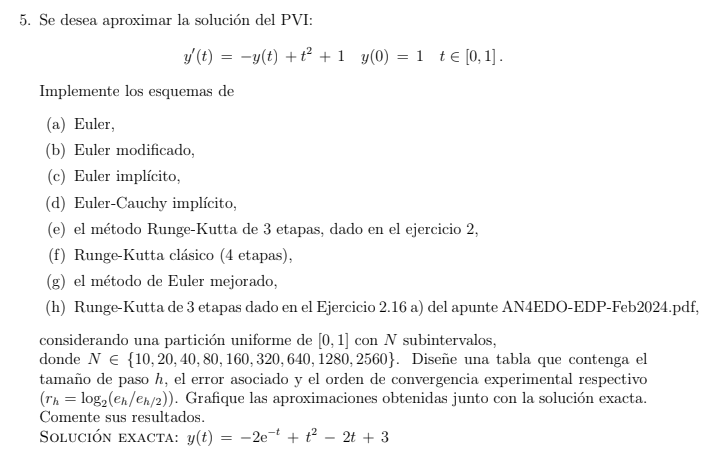

## Método de Euler implícito:

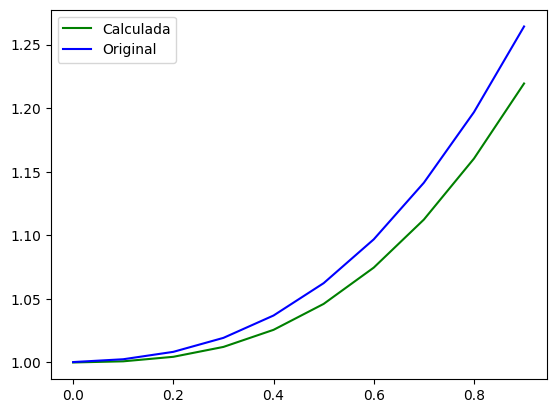


Calculo con 10 particiones:


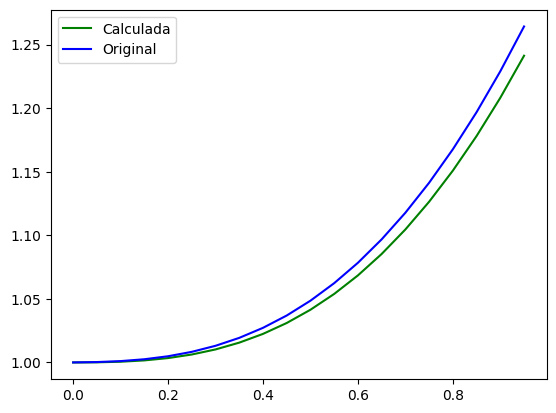


Calculo con 20 particiones:


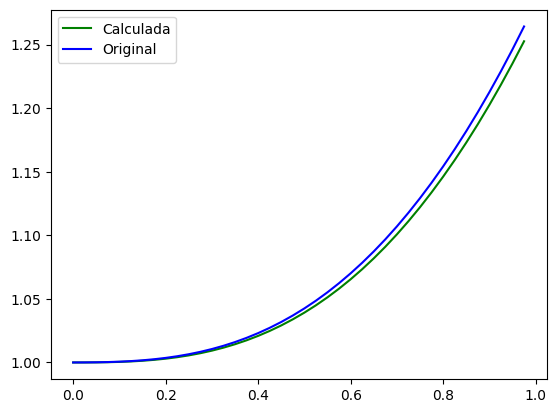


Calculo con 40 particiones:


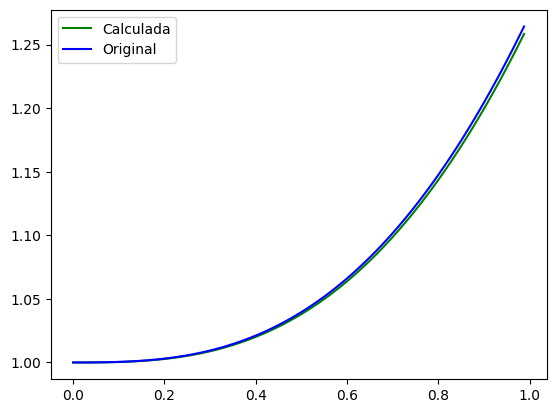


Calculo con 80 particiones:


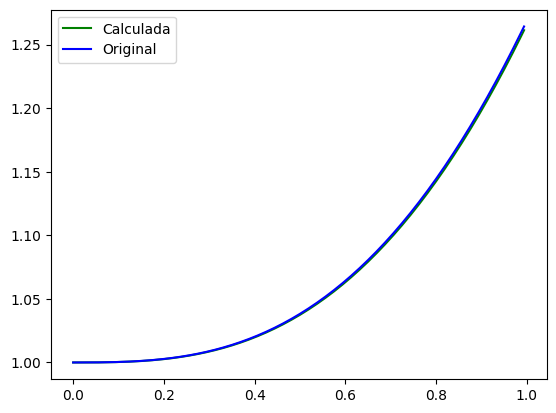


Calculo con 160 particiones:


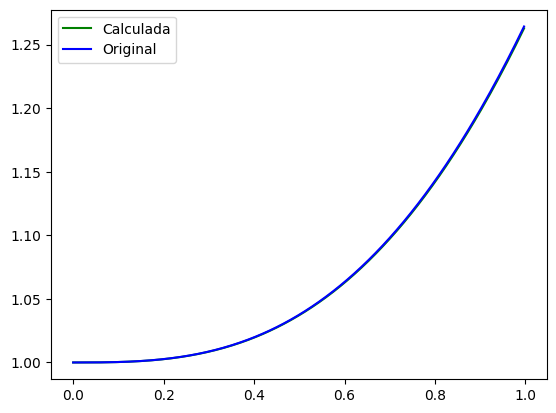


Calculo con 320 particiones:


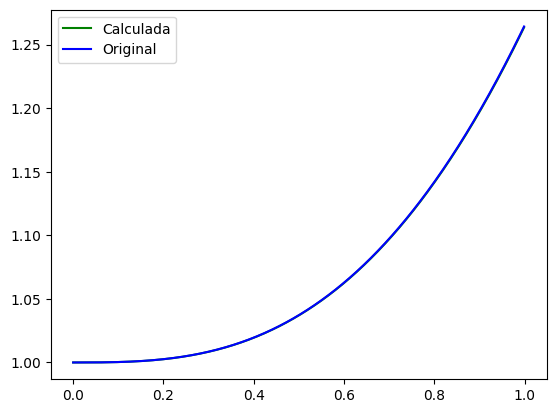


Calculo con 640 particiones:


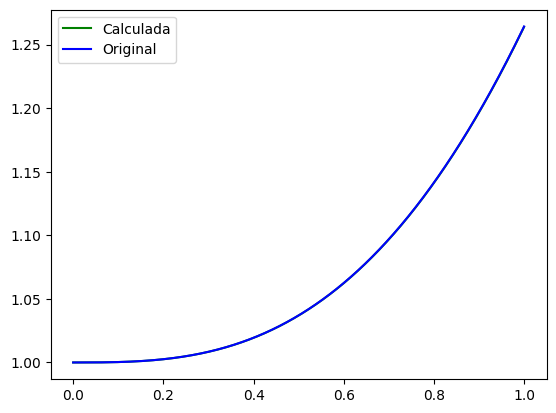


Calculo con 1280 particiones:


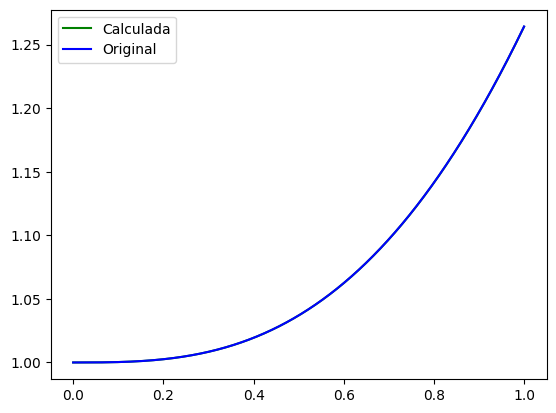


Calculo con 2560 particiones:
Tabla de los resultados para cada valor de h:


,h,Error
0,0.100000,0.044846
1,0.050000,0.022996
2,0.025000,0.011642
3,0.012500,0.005858
4,0.006250,0.002938
5,0.003125,0.001471
6,0.001563,0.000736
7,0.000781,0.000368
8,0.000391,0.000184


In [ ]:
# Número de particiones
N=10

# Se define la función que calcula una aproximación por el método implícito de Euler para un valor N dado.
def euler_implicito(N):
    # Amplitud de la particion
    h=(1-0)/N

    # Se define f(t,y(t))=-y(t)+t**2+1
    # Se toma una lista de las aproximaciones, los valores en esos puntos de la solucion exacta y los errores asociados

    aproximaciones=[1]
    solucion = [1]
    errores = [0]

    # Listas para realizar las graficas de Func. Original Vs Func. Aproximada:
    Listt=[]
    y_calculado=[]
    y_original=[]

    for j in range(N):

        t_j=0+j*h
        t_j_1=t_j+h
        # Se implementa la formula de recurrencia de la aproximacion y la agregamos a aproximaciones
        y_i=(aproximaciones[-1]+h+h*(t_j)**2)/(1+h)
        aproximaciones.append(y_i)

        # Se implementa la formula de recurrencia de la solucion exacta y la agregamos a solucion
        y_real = -2*np.e**(-t_j_1)+(t_j_1**2)-(2*t_j_1)+3
        solucion.append(y_real)

        Listt.append(t_j)
        y_calculado.append(y_i)
        y_original.append(y_real)

        # Se calcula el error y se agrega a errores
        e=abs(y_real-y_i)
        errores.append(e)
    plt.plot(Listt,y_calculado,"g")
    plt.plot(Listt,y_original,"b")
    plt.legend(["Calculada","Original"])
    plt.show()
    return h, max(errores)

# Se crea un arreglo de particiones
particiones=[10,20,40,80,160,320,640,1280,2560]

# Se crea un vector para crear la tabla
v=[]

# Se crea un ciclo para todas las particiones y los resultados se guardan en el vector que crea la tabla
for n in particiones:
    h, error=euler_implicito(n)
    v.append([h,error])
    print(f"\nCalculo con {n} particiones:")

tabla=pd.DataFrame(v)
tabla.columns = ["h","Error"]
print("Tabla de los resultados para cada valor de h:")
display(tabla)

La anterior tabla no solo presenta los resultados solicitados sino que además es interactiva para que el lector consulte otros datos relevantes.

# Ejercicio 7.b:

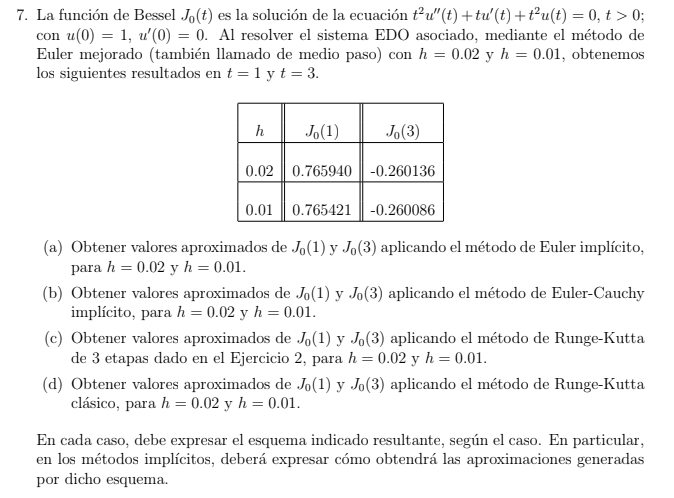

## Método de Euler-Cauchy implícito:

Para solucionar la ecuación $tu''(t)+tu'(t)+t^2u(t)=0$ con $t>0$ realizamos el siguiente reemplazo:

Sea:

$u_1(t)=u(t)$.

$u_2(t)=u'(t)=f_1(t,u_1(t))$.

Así tenemos que:     $u'_2(t)=f_2(t,u_2(t))=u''(t)=\frac{-u'(t)-tu(t)}{t}$.

Sabemos que:

$u_{1,j+1}=u_{1,j}+\frac{h}{2}[f_1(t_j,u_{1,j})+f_1(t_{j+1},u_{1,j+1})]=u_{1,j}+\frac{h}{2}[u_{2,j}+u_{2,j+1}]$.

Además:

$u_{2,j+1}=u_{2,j}+\frac{h}{2}[f_2(t_j,u_{2,j})+f_2(t_{j+1},u_{2,j+1})]=u_{2,j}+\frac{h}{2}[-\frac{u_{2,j}}{t_j}-u_{1,j}-\frac{u_{2,j+1}}{t_{j+1}}-u_{1,j+1}]$.

Reemplazando una de estas ecuaciones en la otra tenemos:

$u_{2,j+1}=u_{2,j}+\frac{h}{2}[-\frac{u_{2,j}}{t_j}-u_{1,j}-\frac{u_{2,j+1}}{t_{j+1}}-u_{1,j}-\frac{h}{2}[u_{2,j}+u_{2,j+1}].]$.

Operando y despejando $u_{2,j+1}$ obtenemos:

$u_{2,j+1}=\frac{[1-\frac{h^2}{4}-\frac{h}{2t_j}]u_{2,j}-hu_{1,j}}{1+\frac{h}{2t_{j+1}}+\frac{h^2}{4}}$.

Ya con este valor conocido podemos hallar $u(t)=u_1(t)$.

In [ ]:
# Para h=0.01.

# Valores del intervalo [a,b] para hacer la partición.
a=0
b=3
N=300 # Número de particiones.

h=(b-a)/N  # Amplitud de la particion

# Valores iniciales:
u_1_j=1
u_2_j=0

# Encabezado:
print(f"Para h={h}")

# Vamos recorriendo cada uno de las valores de la partición realizada:
for j in range(N):

  # t sub j y t sub j+1
  t_j=a+j*h
  t_j_1=a+(j+1)*h

  # calcular u_2_j+1
  u_2_j_1= ((1-((h**2)/4)-(h/2*t_j))*u_2_j-(h*u_1_j))/(1+(h/2*t_j_1)+((h**2)/4))

  # calcular u_1_j+1
  u_1_j_1=u_1_j+((h/2)*(u_2_j+u_2_j_1))

  # Mostramos resultados:
  if t_j_1==1.0 or t_j_1==3.0:
    print(f"t={t_j_1} el valor de J_0 es: {u_1_j_1}")

  # Reemplazamos los valores anteriores.
  u_1_j=u_1_j_1
  u_2_j=u_2_j_1

# Para h=0.02.

# Valores del intervalo [a,b] para hacer la partición.
a=0
b=3
N=150 # Número de particiones.

h=(b-a)/N  # Amplitud de la particion

# Valores iniciales:
u_1_j=1
u_2_j=0

# Repetimos el proceso para h=0.02:
print(f"Para h={h}")
for j in range(N):
  # t sub j y t sub j+1
  t_j=a+j*h
  t_j_1=a+(j+1)*h

  # calcular u_2_j+1
  u_2_j_1= ((1-((h**2)/4)-(h/2*t_j))*u_2_j-(h*u_1_j))/(1+(h/2*t_j_1)+((h**2)/4))

  # calcular u_1_j+1
  u_1_j_1=u_1_j+((h/2)*(u_2_j+u_2_j_1))

  # Mostramos resultados:
  if t_j_1==1.0 or t_j_1==3.0:
    print(f"t={t_j_1} el valor de J_0 es: {u_1_j_1}")

  # Reemplazamos los valores anteriores.
  u_1_j=u_1_j_1
  u_2_j=u_2_j_1

Para h=0.01
t=1.0 el valor de J_0 es: 0.6065445590147773
t=3.0 el valor de J_0 es: 0.01110962143479037
Para h=0.02
t=1.0 el valor de J_0 es: 0.6065862526156761
t=3.0 el valor de J_0 es: 0.011111496310394415


De los resultados anteriores tenemos el siguiente diagrama:

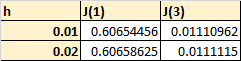